### Importando bibliotecas

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df_pontuacao = pd.read_csv('datasets/pontuacao.csv')
df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


### EDA

<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

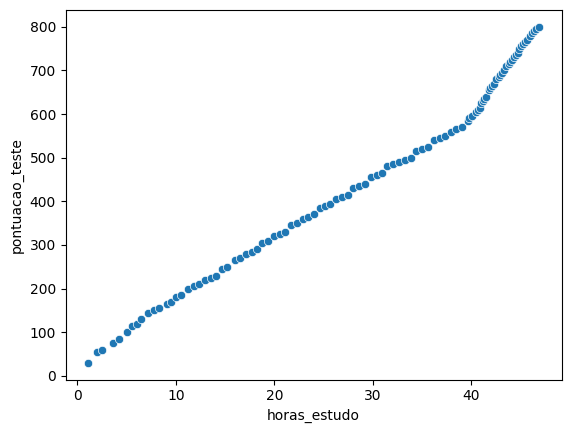

In [ ]:
# Dispersão
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

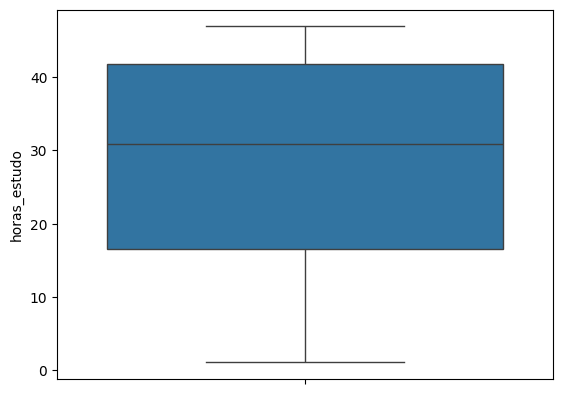

In [ ]:
# box plot
sns.boxplot(data=df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

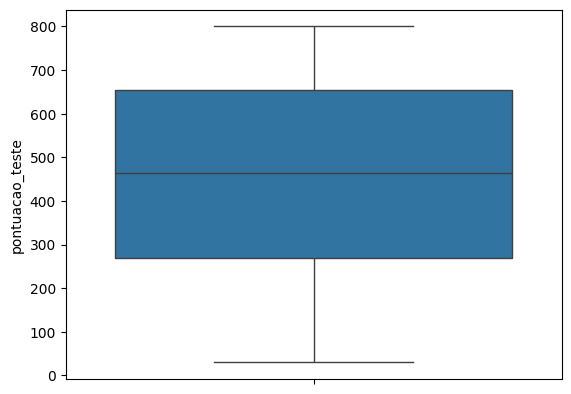

In [ ]:
# box plot
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')

<Axes: >

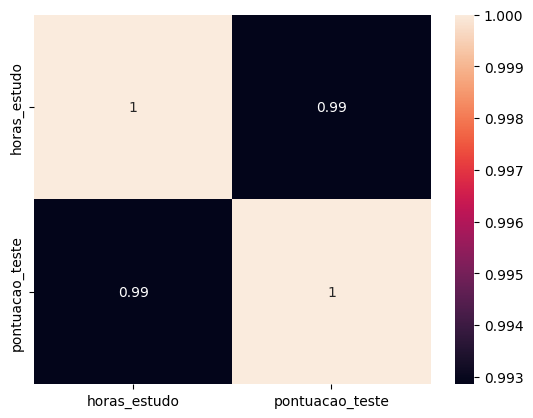

In [ ]:
# heatmap
sns.heatmap(df_pontuacao.corr(), annot=True)

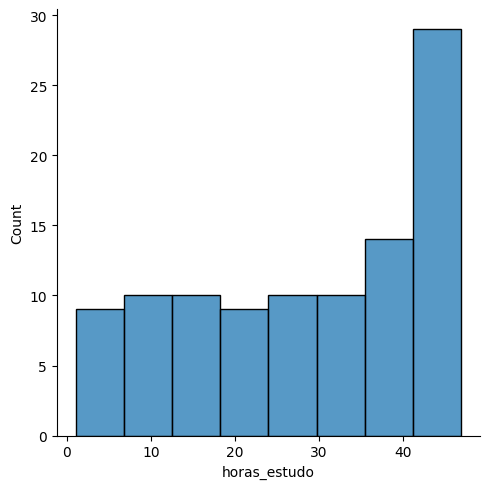

In [ ]:
# histograma das variáveis
sns.displot(df_pontuacao['horas_estudo'])

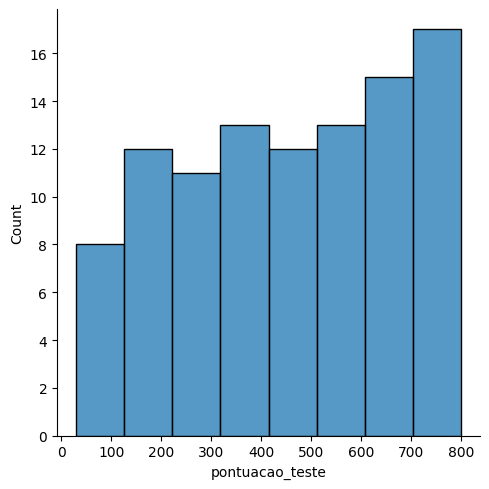

In [ ]:
# histograma das variáveis
sns.displot(df_pontuacao['pontuacao_teste'])

### Treinar o Modelo

In [14]:
# Dividir os dados em treino e teste
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
Y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [11]:
# Instanciar o modelo de regressão linear
reg_model = LinearRegression()

In [15]:
# Treinar o modelo
reg_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Imprimir a equação da reta
print("A equação da reta é Y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é Y = 15.642619x + 8.476601


### Análise de métricas

In [23]:
# Fazer previsões
Y_pred = reg_model.predict(X_test)

In [24]:
# Calcular r squared
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9828400452912442

In [25]:
# MAE - Minimum Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_pred)

22.957470277134615

In [29]:
# MSE - Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

766.9972992416427

In [33]:
# RMSE - Root Mean Squared Error
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(Y_test, Y_pred)

27.69471608884342

<Axes: >

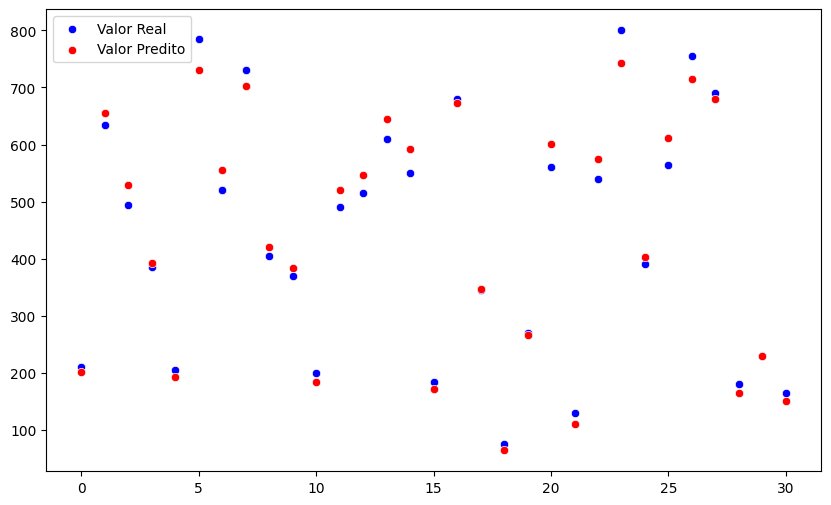

In [40]:
# Análise gráfica
x_axis = range(len(Y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=Y_test.reshape(-1), color='blue', label='Valor Real')
sns.scatterplot(x=x_axis, y=Y_pred.reshape(-1), color='red', label='Valor Predito')